In [1]:
import AdventOfCode

In [2]:
input <- dayLines 10

In [3]:
{-# LANGUAGE OverloadedStrings #-}

import Data.ByteString (ByteString)
import qualified Data.Attoparsec.ByteString.Char8 as C

ex = "position=< 41465, -51440> velocity=<-4,  5>" :: ByteString

parseCoord = (,) <$> ("<" *> (C.skipSpace *> C.signed C.decimal)) <*> ("," *> (C.skipSpace *> C.signed C.decimal) <* ">")

parseLine = (,) <$> ("position=" *> parseCoord <* C.skipSpace) <*> ("velocity=" *> parseCoord)

(positions', velocities') = unzip $ map (parsed parseLine) input

flipY (x,y) = (x, negate y)
positions = fmap flipY positions'
velocities = fmap flipY velocities'

In [4]:
import Graphics.Rendering.Chart.Easy
import Graphics.Rendering.Chart.Renderable
import IHaskell.Display.Charts
import IHaskell.Display

add (a, b) (c, d) = (a+c, b+d)

moving = drop 10312 $ iterate (zipWith add velocities) positions

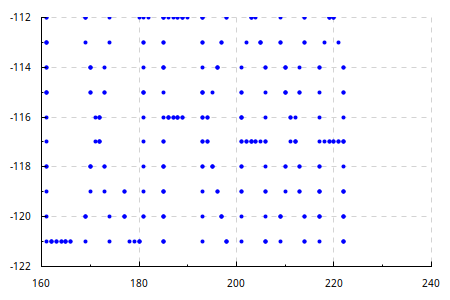

In [5]:
display . toRenderable . plot . points "" $ head moving